In [1]:
import cv2
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import pickle

In [2]:
%matplotlib inline

In [3]:
#LOADING THE IMAGES PRESENT IN CAMERA_CAL FOLDER#
chessboards = []
for n in range(20):
    this_path = 'camera_cal/calibration' + str(n + 1) + '.jpg'
    chessboard =plt.imread(this_path)
    chessboards.append(chessboard)

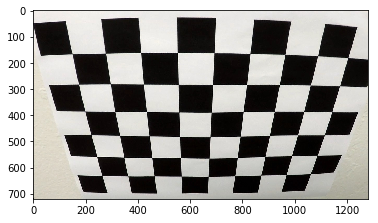

In [4]:
#DISPLAYING ONE OF THE IMAGES IN RGB FORMAT#
plt.imshow(chessboards[1])

In [5]:
#CONVERTING THE IMAGES TO GRAY SCALE#
gray=[]
for chessboard in chessboards:
    gray.append(cv2.cvtColor(chessboard,cv2.COLOR_RGB2GRAY))

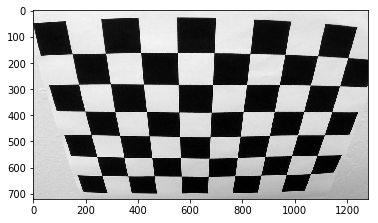

In [6]:
#DISPLAYING ONE OF THE IMAGES IN GRAY SCALE FORMAT#
plt.imshow(gray[1],cmap='gray')

In [7]:
#FINDING CORNERS ALONG THE CHESSBOARD#
corners=[]
has_corners=[]
for image in gray:
    temp=cv2.findChessboardCorners(image,(9,6), None)
    corners.append(temp[1])
    has_corners.append(temp[0])


In [8]:
#DRAWING THE CORNERS ON THE BOARD#
image_with_corners=[]
for i in range(len(chessboards)):
    image_with_corners.append(np.copy(chessboards[i]))
    cv2.drawChessboardCorners(image_with_corners[i],(9,6), corners[i], has_corners[i])

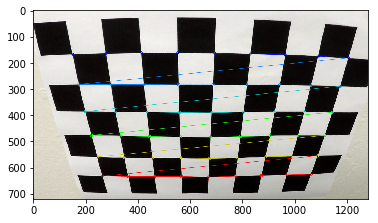

In [9]:
#DRAWING THE IMAGE WITH DETECTED CORNERS#
plt.imshow(image_with_corners[1])

In [10]:
#GETTING THE ACTUAL POINT AND IMAGE POINT FOR CORNER DETECTED IMAGE#
obj_points=[]#actual chessboard corners#
image_points=[]#distorted chess board corners#
objp=np.zeros((6*9,3),np.float32)#INITIALISING ALL THE CORNER POINTS AS (0,0)#
for i in range(len(chessboards)):
    if has_corners[i]:
        image_points.append(corners[i])
        obj_points.append(objp)

In [11]:
#CALIBRATING THE CAMERA ACCODINGLY#
objp[:,:2]=np.mgrid[0:9,0:6].T.reshape(-1,2)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, image_points, gray[0].shape[::-1],None,None)

In [12]:
dst = cv2.undistort(chessboards[9], mtx, dist, None, mtx)

In [13]:
#SAVING THE CALIBRATED DATA#
calibration_data = {
    "camera_matrix": mtx, 
    "distortion_coefficient":dist
}
pickle.dump(calibration_data, open( "calibration_data.p", "wb" ))

In [14]:
calibration_data

{'camera_matrix': array([[1.15777818e+03, 0.00000000e+00, 6.67113857e+02],
        [0.00000000e+00, 1.15282217e+03, 3.86124583e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 'distortion_coefficient': array([[-0.24688507, -0.02373155, -0.00109831,  0.00035107, -0.00259868]])}

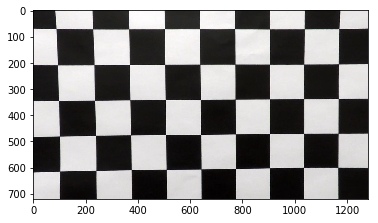

In [18]:
plt.imshow(cv2.undistort(chessboards[0],mtx,dist,None,mtx))